In [442]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
from sklearn.decomposition.pca import PCA
from sklearn.neighbors import KNeighborsClassifier
import math
import random
 
# load images
dataset_path = 'faces/'
generated_data_path = 'faceWithAcne/'


def printOrigin (file):
    image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    plt.title(file), plt.xticks([]), plt.yticks([])
    plt.imshow(image, cmap='gray')
    plt.show()
    
def addAcne(file,face_lu, face_rb):
    offset = 20
    acnePosition = {"x_range":[face_lu[0],face_rb[0]], "y_range":[face_lu[1],face_rb[1]]}
    
    acne_x = int(random.randrange (acnePosition["x_range"][0]+offset, acnePosition["x_range"][1]-offset))
    acne_y = int(random.randrange (acnePosition["y_range"][0]+offset, acnePosition["y_range"][1]-offset))
  
    
    
    im = cv2.imread(dataset_path+file)
    obj= cv2.imread("acne1.jpg")
    #obj = cv2.resize(obj,(int(obj.shape[0]*0.8), int(obj.shape[1]*0.8)))
 
    # Create an all white mask
    mask = 255 * np.ones(obj.shape, obj.dtype)
 
    width, height, channels = im.shape
    center = (acne_x, acne_y)
    
    normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
    
    multiple_ance= int(random.randrange(0,4,1))
    for i in range(multiple_ance):
        acne_x = random.randrange (acnePosition["x_range"][0]+offset, acnePosition["x_range"][1]-offset)
        acne_y = random.randrange (acnePosition["y_range"][0]+offset, acnePosition["y_range"][1]-offset)
        center = (acne_x, acne_y)
        normal_clone = cv2.seamlessClone(obj, normal_clone, mask, center, cv2.NORMAL_CLONE)
    
     
    cv2.imwrite(file, normal_clone)


    normal_clone = cv2.cvtColor(normal_clone, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,8))
    plt.imshow(normal_clone)
    
   
    
def resizeImage(file):
    img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img,(800,1000))
    cv2.imwrite(file, img)

    





In [443]:
def lbpDetetction(testImage):
    # Parameter specifying how much the image size is reduced at each image scale
    face_scaleFactor = 1.2
    # Parameter specifying how many neighbors each candidate rectangle should have to retain it.
    face_minNeighbors = 4
    
    data_path = cv2.data.haarcascades

    lbp_face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'lbpcascade_frontalface.xml'))
    lbp_face_cascade
    img = cv2.imread(testImage)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # detect faces
    lbp_faces = lbp_face_cascade.detectMultiScale(img_gray, face_scaleFactor,face_minNeighbors)
#     if len(lbp_faces) != 0:
#         return (lbp_faces[0][0],lbp_faces[0][1]), (lbp_faces[0][0]+lbp_faces[0][2], lbp_faces[0][1]+lbp_faces[0][3]) 
#     else:
#         return (200,200),(550,800)
    for (x,y,w,h) in lbp_faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)

    
    return (x,y),(x+w, y+h)
   


/Users/missbamboo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


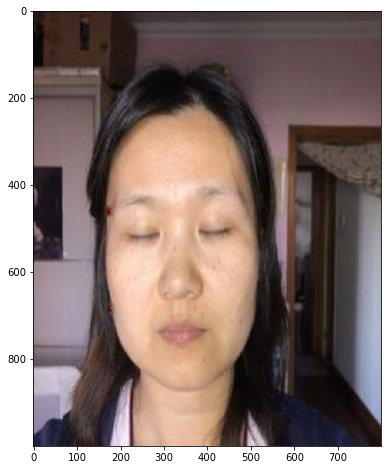

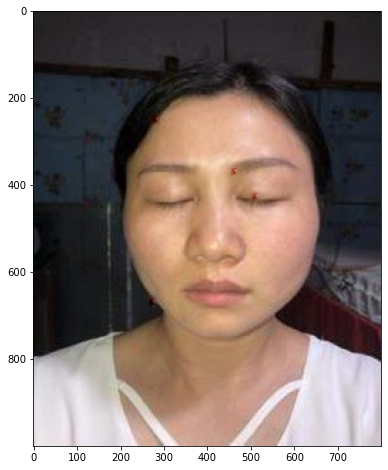

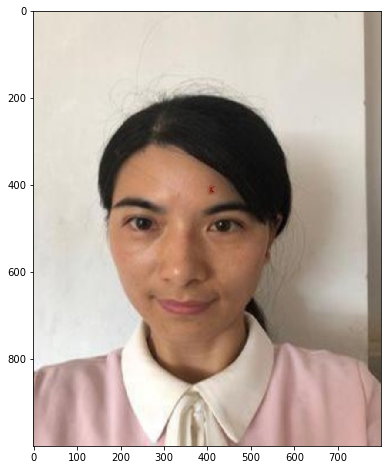

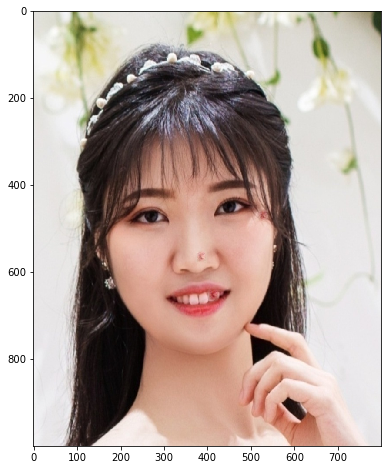

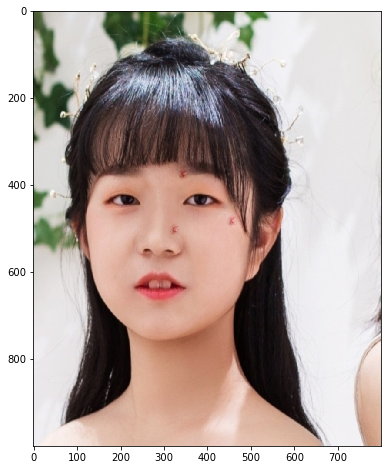

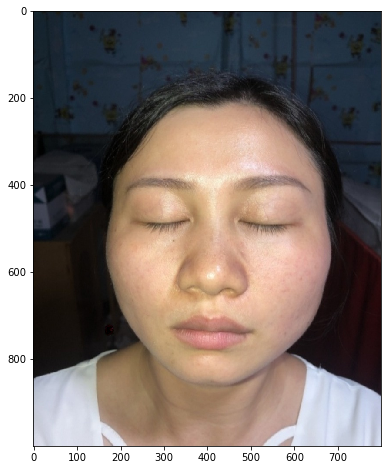

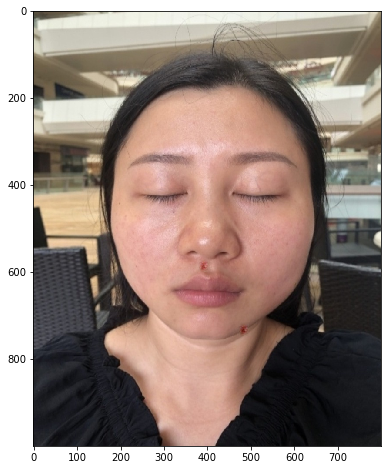

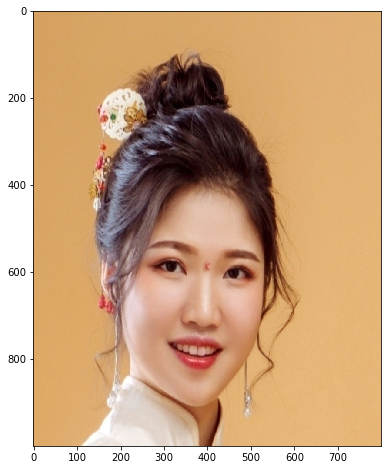

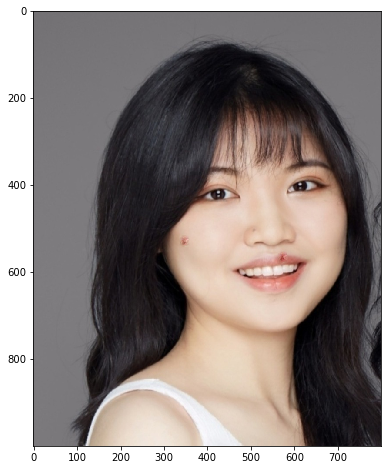

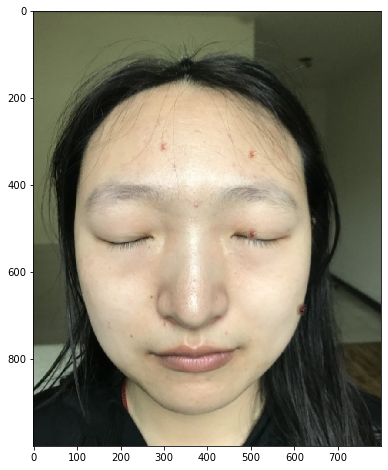

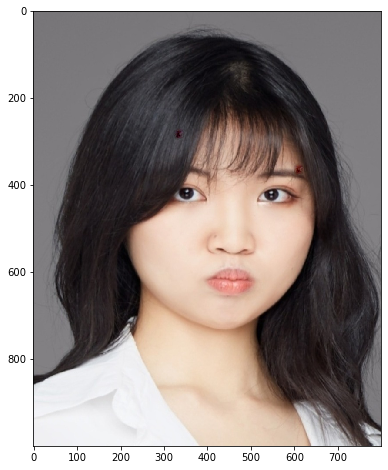

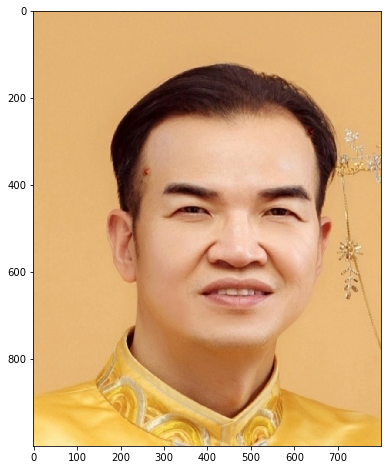

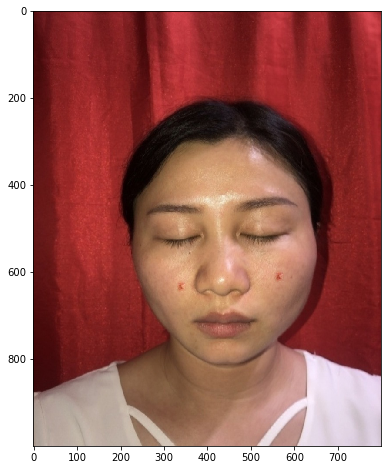

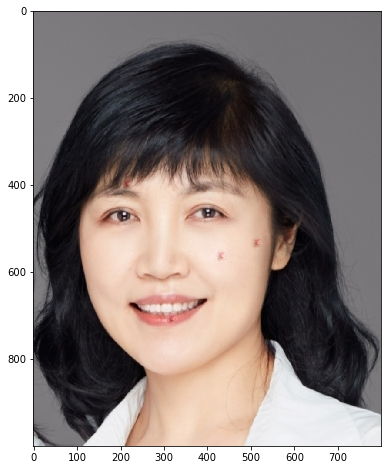

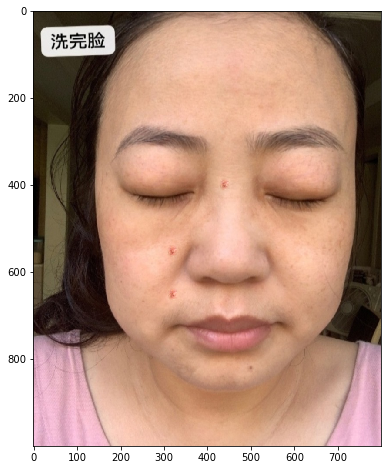

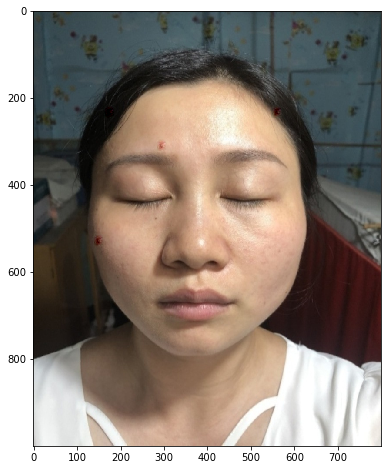

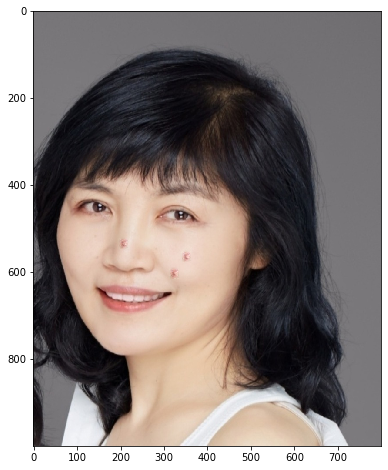

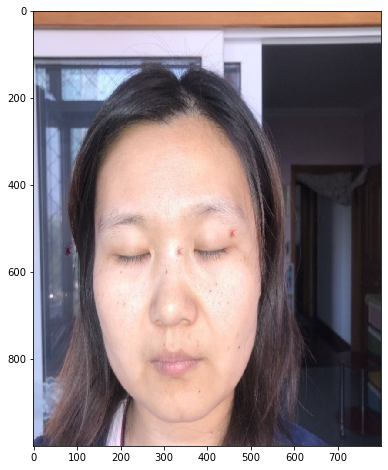

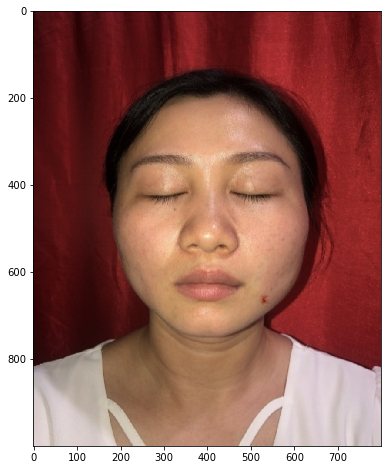

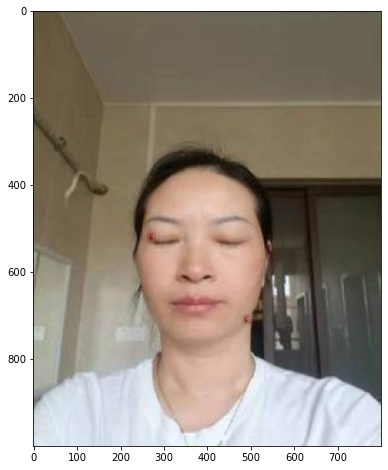

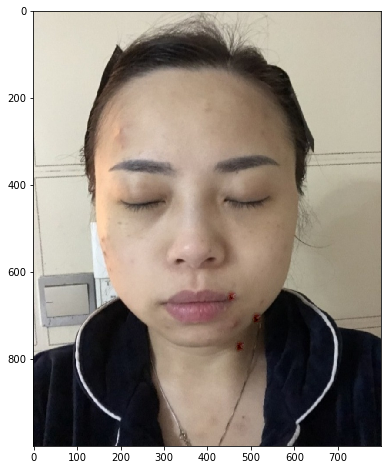

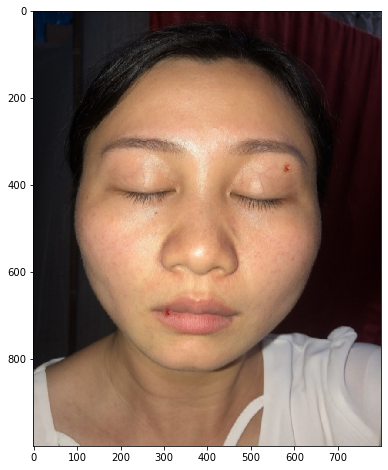

In [444]:
for file in os.listdir(dataset_path):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"): 
        #printOrigin(file)
        resizeImage(dataset_path+file)
        face_leftUp, face_rightBottom =lbpDetetction(dataset_path+file)
        
        addAcne(file, face_leftUp, face_rightBottom)
        